In [11]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
Matplotlib: Exploring <br> <br> <br>Data Visualization</p><br><br>

Matplotlib is good b/c it's clean and generally aesthetically pleasing, especially for data exploration.
* can produce a number of different charts in a few lines of code to check correlations, relationships, trend lines, and get a better feel of the distribution of the data
* can also create complex visualizations where we customize plots to present results
* Matplotlib is also fairly low-level, compared to **Seaborn, ggplot, Altair, Bokeh, Plotly, Folium**, etc., depending on the visualization needs

<br><br><center><h1 style="font-size:2em;color:#2467C0">World Development Indicators</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/4/46/North_South_divide.svg" align="middle" style="width:550px;height:360px;"/></td>
<td>
This week, we will be using an open dataset from <a href="https://www.kaggle.com">Kaggle</a>. It is  <a href="https://www.kaggle.com/worldbank/world-development-indicators">The World Development Indicators</a> dataset obtained from the World Bank, containing over a thousand annual indicators of economic development from hundreds of countries around the world.
<br>
<br>
This is a slightly modified version of the original dataset from <a href="http://data.worldbank.org/data-catalog/world-development-indicators">The World Bank</a>
<br>
<br>
List of the <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/indicators-in-data">available indicators</a> and a <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/countries-in-the-wdi-data">list of the available countries</a>.
</td>
</tr>
</table>

# Step 1 of any Data Science Project: *Initial exploration of the Dataset*

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
!dir .\

 Volume in drive C is OSDisk
 Volume Serial Number is 78F8-20FE

 Directory of C:\Users\NEWNSS\Dropbox\DataScienceMasters\UCSD\PythonForDataScience\Week5\Week5-Visualization

07/04/2017  02:12 PM    <DIR>          .
07/04/2017  02:12 PM    <DIR>          ..
07/04/2017  02:08 PM    <DIR>          .ipynb_checkpoints
07/04/2017  02:12 PM           125,215 05a_Matplotlib_Notebook.ipynb
07/03/2017  02:46 PM           511,733 05b_Exploring Indicator's Across Countries.ipynb
07/03/2017  02:46 PM            14,054 05c_Folium_Notebook.ipynb
               3 File(s)        651,002 bytes
               3 Dir(s)  122,663,051,264 bytes free


In [2]:
# read in data and see its shape (rows + cols/records + variables)
wdi = pd.read_csv('C:/world-development-indicators/Indicators.csv')
wdi.shape

(5656458, 6)

This is a really large dataset, at least in terms of the number of rows.  But with 6 columns, what does this hold?

In [9]:
data.head(10)

CountryName CountryCode                                      IndicatorName  \
0  Arab World         ARB  Adolescent fertility rate (births per 1,000 wo...   
1  Arab World         ARB  Age dependency ratio (% of working-age populat...   
2  Arab World         ARB  Age dependency ratio, old (% of working-age po...   
3  Arab World         ARB  Age dependency ratio, young (% of working-age ...   
4  Arab World         ARB        Arms exports (SIPRI trend indicator values)   
5  Arab World         ARB        Arms imports (SIPRI trend indicator values)   
6  Arab World         ARB               Birth rate, crude (per 1,000 people)   
7  Arab World         ARB                                 CO2 emissions (kt)   
8  Arab World         ARB             CO2 emissions (metric tons per capita)   
9  Arab World         ARB  CO2 emissions from gaseous fuel consumption (%...   

       IndicatorCode  Year         Value  
0        SP.ADO.TFRT  1960  1.335609e+02  
1        SP.POP.DPND  1960  8.779760e+01  
2     SP.POP.DPND.OL  1960  6.634579e+00  
3     SP.POP.DPND.YG  1960  8.102333e+01  
4     MS.MIL.XPRT.KD  1960  3.000000e+06  
5     MS.MIL.MPRT.KD  1960  5.380000e+08  
6     SP.DYN.CBRT.IN  1960  4.769789e+01  
7     EN.ATM.CO2E.KT  1960  5.956399e+04  
8     EN.ATM.CO2E.PC  1960  6.439635e-01  
9  EN.ATM.CO2E.GF.ZS  1960  5.041292e+00

Looks like it has different indicators for different countries with the year and value of the indicator, so it's really a 4 dimensional dataset w/ basically duplicates for country and indicator.

### How many UNIQUE country names are there ?

In [6]:
countries = wdi['CountryName'].unique().tolist()
countries[:5]

['Arab World',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)']

In [8]:
# get length of the list/# of unique countries
len(countries)

247

There are 247 unique countries in this dataset

### Are there same number of country codes ?

In [9]:
countryCodes = wdi['CountryCode'].unique().tolist()
len(countryCodes)

247

Yes, there are the same amount of country codes.

### Are there many indicators or few ?

In [10]:
indicators = wdi['IndicatorName'].unique().tolist()
len(indicators)

1344

There are *a lot* of indicators of economic development

### How many years of data do we have ?

In [12]:
years = wdi['Year'].unique().tolist()
len(years)

56

In [15]:
print(min(years), "to",max(years))

1960 to 2015


We have data over 56 years, from 1960 to 2015

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold">
Matplotlib: Basic Plotting, Part 1</p><br>

### Lets pick a country and an indicator to explore: CO2 Emissions per capita and the USA

In [3]:
# select the CO2 emissions indicator for the United States
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

# creat filter to only retrieve data for the specified indicator and coutnry above
mask1 = wdi['IndicatorName'].str.contains(hist_indicator) 
mask2 = wdi['CountryCode'].str.contains(hist_country)

# stage = just those indicators matching 'USA' for country code and 'CO2 emissions' over time.
stage = wdi[mask1 & mask2]

In [4]:
stage.head()

CountryName CountryCode                           IndicatorName  \
22232   United States         USA  CO2 emissions (metric tons per capita)   
48708   United States         USA  CO2 emissions (metric tons per capita)   
77087   United States         USA  CO2 emissions (metric tons per capita)   
105704  United States         USA  CO2 emissions (metric tons per capita)   
134742  United States         USA  CO2 emissions (metric tons per capita)   

         IndicatorCode  Year      Value  
22232   EN.ATM.CO2E.PC  1960  15.999779  
48708   EN.ATM.CO2E.PC  1961  15.681256  
77087   EN.ATM.CO2E.PC  1962  16.013937  
105704  EN.ATM.CO2E.PC  1963  16.482762  
134742  EN.ATM.CO2E.PC  1964  16.968119

### Let's see how emissions have changed over time using MatplotLib

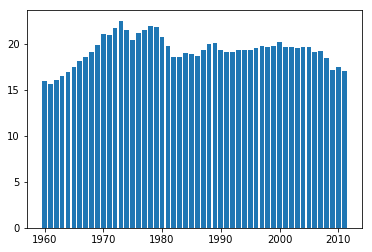

In [45]:
%matplotlib inline
# get the years and the values from our staged data
years = stage['Year'].values
co2 = stage['Value'].values

# show barplot of CO2 emissions over the years
plt.bar(years,co2)
plt.show()

Turns out emissions per capita have remained steady for a while, with a peak a little after 1970 and then a drop. 

But let's make this graphic a bit more appealing before we continue to explore it.

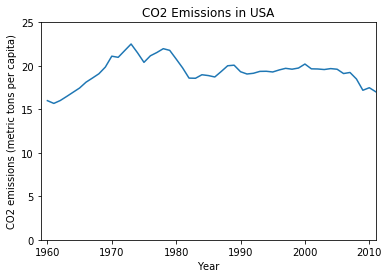

In [12]:
# switch to a line plot with .pot(x-axis,y-axis)
plt.plot(stage['Year'].values, stage['Value'].values)

# Label axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0]) # value from 1st row  

# label figure
plt.title('CO2 Emissions in USA')

# start y axis at 0 to be more honest
plt.axis([1959, 2011,0,25])

plt.show()

### Using Histograms to explore the distribution of values
We could also visualize this data as a histogram to better explore the ranges of values in CO2 production per year. 

Sometimes it's better for histograms to avoid showing data that is getting too spread out, due to possible outliers.

In [46]:
# To just include those within 1 standard deviation of the mean, do the following
#     lower = stage['Value'].mean() - stage['Value'].std()
#     upper = stage['Value'].mean() + stage['Value'].std()
#     hist_data = [x for x in stage[:10000]['Value'] if x > lower and x < upper ]

# Otherwise, look at all the data

# get all CO2 emissions per capita values from the data set into an ndarray
hist_data = stage['Value'].values

In [15]:
# there are 52 data points in our ndarray
print(len(hist_data))

52


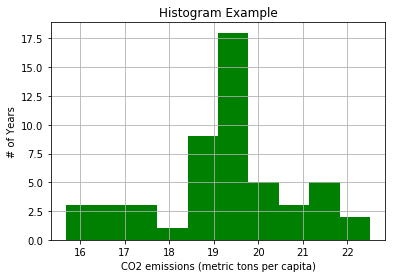

In [19]:
# the histogram of the data with .hist(data,bins,....)
# make normed = False to avoid scaling the data
plt.hist(hist_data, 10, normed = False, facecolor = 'green')

# label the axis and title the plot
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

# give plot a grid
plt.grid(True)

plt.show()

So the USA has many years where it produced between 18.5-20 metric tons per capita with outliers on either side.

### But how do the USA's numbers relate to those of other countries, given we fall between 19-20 metric tons per capita of CO2 emissions?

In [21]:
# select CO2 emissions for ALL countries in just 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

# create the filters
mask1 = wdi['IndicatorName'].str.contains(hist_indicator) 
mask2 = wdi['Year'].isin([hist_year])

# apply masks to get only CO2 emissions from 2011 and check
co2_2011 = wdi[mask1 & mask2]
co2_2011.head()

CountryName CountryCode  \
5026275                               Arab World         ARB   
5026788                   Caribbean small states         CSS   
5027295           Central Europe and the Baltics         CEB   
5027870  East Asia & Pacific (all income levels)         EAS   
5028456    East Asia & Pacific (developing only)         EAP   

                                  IndicatorName   IndicatorCode  Year  \
5026275  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2011   
5026788  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2011   
5027295  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2011   
5027870  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2011   
5028456  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  2011   

            Value  
5026275  4.724500  
5026788  9.692960  
5027295  6.911131  
5027870  5.859548  
5028456  5.302499

For how many countries do we have CO2 per capita emissions data in 2011

In [22]:
len(co2_2011)

232

We have 2011 CO2 emissions data from 232 countries (not all in the dataset). We'd also generally suspect the US produces more CO2 per person than other countries.

Plot a histogram of the emmissions per capita by country

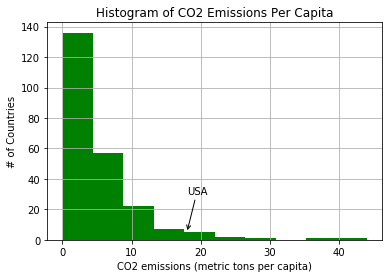

In [28]:
# subplots returns a touple with the figure and axis attributes SEPERATELY
fig, ax = plt.subplots()

# annotate the hisogram with the label USA
ax.annotate("USA",
            xy=(18, 5), xycoords='data', #draw line from (18,30) to (18,5)
            xytext=(18, 30), textcoords='data', #put label text at (18,30)
            arrowprops=dict(arrowstyle="->", #create arrow
                            connectionstyle="arc3"),
            )

# histogram of 2011 CO2 emissions data in 10 bins, not scaled
plt.hist(co2_2011['Value'], 10, normed = False, facecolor = 'green')

# Create axis labels and Title
plt.xlabel(co2_2011['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

#plt.axis([10, 22, 0, 14])

# give it a grid
plt.grid(True)

plt.show()

So the USA, at ~18 CO2 emissions (metric tons per capital) is quite high among all countries, so it's an outlier. Most countries are only between 0-10 metric tons of CO2 emissions per capita.

An interesting next step, which we'll save for you, would be to explore how this relates to other industrialized nations and to look at the outliers with those values in the 40s!

(array([ 0.,  0.,  1.,  0.]),
 array([ 43.51892637,  43.76892637,  44.01892637,  44.26892637,  44.51892637]),
 <a list of 4 Patch objects>)

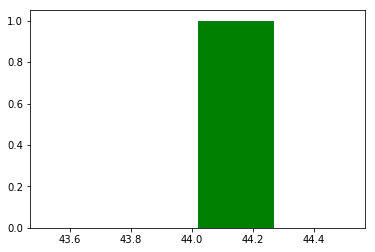

In [49]:
# select CO2 emissions for ALL countries in just 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

# create the filters
mask1 = wdi['IndicatorName'].str.contains(hist_indicator) 
mask2 = wdi['Year'].isin([hist_year])

# apply masks to get only CO2 emissions from 2011 and check
co2_2011 = wdi[mask1 & mask2]

hist_data = [x for x in co2_2011['Value'] if x > 40]

plt.hist(hist_data, 4, normed = False, facecolor = 'green')

There's only 1 country with CO2 emissions in 2011 that are above 40 metric tons per capita

In [58]:
high_co2 = co2_2011['Value'] > 40
co2_2011[high_co2]

CountryName CountryCode                           IndicatorName  \
5161482       Qatar         QAT  CO2 emissions (metric tons per capita)   

          IndicatorCode  Year      Value  
5161482  EN.ATM.CO2E.PC  2011  44.018926

<p style="font-family: Arial; font-size:2.0em;color:blue; font-style:bold">
Matplotlib: Basic Plotting, Part 2</p>

### Relationship between GPD and CO2 Emissions in USA

In [67]:
# select indicator of GDP Per capita emissions for country = United States
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

# create filter based on selected indicator and country
mask1 = wdi['IndicatorName'].str.contains(hist_indicator) 
mask2 = wdi['CountryCode'].str.contains(hist_country)

# retrieve just data matching the indicator and USA for country code
gdp_usa = wdi[mask1 & mask2]

In [68]:
gdp_usa.head(2)

CountryName CountryCode                       IndicatorName  \
22282  United States         USA  GDP per capita (constant 2005 US$)   
48759  United States         USA  GDP per capita (constant 2005 US$)   

        IndicatorCode  Year         Value  
22282  NY.GDP.PCAP.KD  1960  15482.707760  
48759  NY.GDP.PCAP.KD  1961  15578.409657

In [69]:
stage.head(2)

CountryName CountryCode                           IndicatorName  \
22232  United States         USA  CO2 emissions (metric tons per capita)   
48708  United States         USA  CO2 emissions (metric tons per capita)   

        IndicatorCode  Year      Value  
22232  EN.ATM.CO2E.PC  1960  15.999779  
48708  EN.ATM.CO2E.PC  1961  15.681256

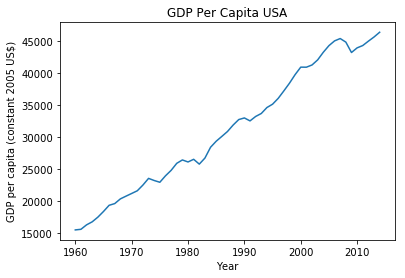

In [73]:
# switch to a line plot to show GDP values by the Years
plt.plot(gdp_usa['Year'].values, gdp_usa['Value'].values)

# Label axes
plt.xlabel('Year')
plt.ylabel(gdp_usa['IndicatorName'].iloc[0])

# label figure
plt.title('GDP Per Capita USA')

plt.show()

So although we've seen a decline in the CO2 emissions per capita, it does not seem to translate to a decline in GDP per capita

### ScatterPlot for comparing GDP against CO2 emissions (per capita)

First, we'll need to make sure we're looking at the same time frames, because scatterplots need to have the same number of points for each variable, so we'll print out the minimum and maximum years that we have data for GDP and for CO2 emissions.

In [75]:
print("GDP Min Year = ", gdp_usa['Year'].min(), "GDP Max Year = : ", gdp_usa['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(), "CO2 Max Year = : ", stage['Year'].max())

GDP Min Year =  1960 GDP Max Year = :  2014
CO2 Min Year =  1960 CO2 Max Year = :  2011


We have 3 extra years of GDP data, so let's trim those off so the scatterplot has equal length arrays to compare (this is actually required by scatterplot)

In [78]:
# get all years < 2012 to only have GDP data up to 2011
gdp_usa_trunc = gdp_usa[gdp_usa['Year'] < 2012]
print(len(gdp_usa_trunc),'\n',len(stage))

52 
 52


Good, now we have an equal amount of years, so we have the same time frame for each variable.

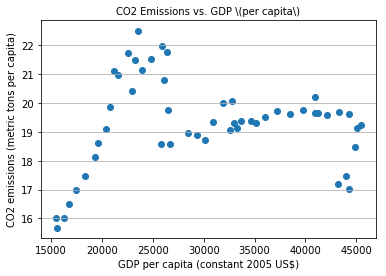

In [80]:
# set up figure and axis
fig, axis = plt.subplots()

# set up Grid lines, axis label, and titles
axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)', fontsize = 10)
axis.set_xlabel(gdp_usa_trunc['IndicatorName'].iloc[0], fontsize = 10)
axis.set_ylabel(stage['IndicatorName'].iloc[0], fontsize = 10)

# set up the variable to use for each axis
X = gdp_usa_trunc['Value']
Y = stage['Value']

# plot the
axis.scatter(X, Y)
plt.show()

This doesn't look like a strong relationship.  We can test this by looking at correlation.

In [81]:
# use Numpy function .corrcoef(var1,var2)
np.corrcoef(gdp_usa_trunc['Value'],stage['Value'])

array([[ 1.        ,  0.07676005],
       [ 0.07676005,  1.        ]])

A correlation of 0.07 is very weak.

You could continue to explore this to see if other countries have a closer relationship between CO2 emissions and GDP.  Perhaps it is stronger for developing countries?

## Want more ? 

### Matplotlib Examples Library

http://matplotlib.org/examples/index.html

In [ ]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;